In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import pandas as pd
import numpy as np

In [6]:
data = pd.read_csv("dataset.csv")

# Chosing the most usefull columns - description
- ID column contains only nan and 0.0 values so we delete it
- HOURS contains the same information as HRS_BEGIN + HRS_END but in worse data format so we chose HRS_BEGIN & HOURS_END insted of HOURS
- Agency contains only 97 non-null values, which is only 1.2% of our data so we delete it
- HRS_BEGIN is the same as FROM_TIME but it has less null values and data format is better for us if we want to use this data set for some ML - example: 
    - 3am in FROM_TIME = 300 in HRS_BEGIN, 3pm in FROM_TIME = 1500 in HRS_BEGIN
- HRS_END is better than TIME_TO on the same basis as the above

In [7]:
columns = ['REGULATION', 'DAYS', 'HRS_BEGIN', 'HRS_END', 'HRLIMIT', 'LAST_EDITED_USER', 'LAST_EDITED_DATE', 'EXCEPTIONS', 'shape']

In [8]:
df = data[columns]

In [9]:
df.head()

,REGULATION,DAYS,HRS_BEGIN,HRS_END,HRLIMIT,LAST_EDITED_USER,LAST_EDITED_DATE,EXCEPTIONS,shape
0,Time limited,M-Sa,700.0,1800.0,1.0,MTA,20170513001346,None. Regulation applies to all vehicles.,"MULTILINESTRING ((-122.49074 37.74207, -122.49..."
1,Time limited,M-F,900.0,1800.0,4.0,GCHAN,20190820232238,None. Regulation applies to all vehicles.,"MULTILINESTRING ((-122.38895 37.742348, -122.3..."
2,Time limited,M-F,900.0,1800.0,4.0,GCHAN,20190820232234,None. Regulation applies to all vehicles.,"MULTILINESTRING ((-122.38897 37.742317, -122.3..."
3,Time limited,M-F,900.0,1800.0,4.0,GCHAN,20190820232309,None. Regulation applies to all vehicles.,"MULTILINESTRING ((-122.388504 37.74297, -122.3..."
4,No parking any time,NaN,NaN,NaN,NaN,RAYNELLCOOPER,20191031234514,None. Regulation applies to all vehicles.,"MULTILINESTRING ((-122.38898 37.764225, -122.3..."


In [10]:
print(df.REGULATION)

0              Time limited
1              Time limited
2              Time limited
3              Time limited
4       No parking any time
               ...         
7742      Government permit
7743      Government permit
7744      Government permit
7745      Government permit
7746      Government permit
Name: REGULATION, Length: 7747, dtype: object


# Removing the rows containing an empty value in REGULATION column
##### We are deleting these rows, because REGULATION attribute is our ML target

In [11]:
df.dropna(how = "any", subset = ["REGULATION"], inplace = True)

In [12]:
df.head()

,REGULATION,DAYS,HRS_BEGIN,HRS_END,HRLIMIT,LAST_EDITED_USER,LAST_EDITED_DATE,EXCEPTIONS,shape
0,Time limited,M-Sa,700.0,1800.0,1.0,MTA,20170513001346,None. Regulation applies to all vehicles.,"MULTILINESTRING ((-122.49074 37.74207, -122.49..."
1,Time limited,M-F,900.0,1800.0,4.0,GCHAN,20190820232238,None. Regulation applies to all vehicles.,"MULTILINESTRING ((-122.38895 37.742348, -122.3..."
2,Time limited,M-F,900.0,1800.0,4.0,GCHAN,20190820232234,None. Regulation applies to all vehicles.,"MULTILINESTRING ((-122.38897 37.742317, -122.3..."
3,Time limited,M-F,900.0,1800.0,4.0,GCHAN,20190820232309,None. Regulation applies to all vehicles.,"MULTILINESTRING ((-122.388504 37.74297, -122.3..."
4,No parking any time,NaN,NaN,NaN,NaN,RAYNELLCOOPER,20191031234514,None. Regulation applies to all vehicles.,"MULTILINESTRING ((-122.38898 37.764225, -122.3..."


# Changing all our string data into lower case
##### As we can see below in non-number data we have some regulations that are included multiple times (e.g. 'Time limited' and 'Time LImited') which are done by case sensitivity so we want to transform all strings into lower case to deal with duplicates

In [13]:
regulations = np.unique([reg for reg in df.REGULATION if not pd.isnull(reg)])
for regulation in regulations:
    print(regulation)

Government Permit
Government permit
Limited No Parking
No Oversized Vehicles
No Parking Anytime
No Stopping
No overnight parking
No oversized vehicles
No parking any time
Paid + Permit
Time LImited
Time Limited
Time limited


In [14]:
string_cols = ['REGULATION', 'DAYS', 'LAST_EDITED_USER', 'EXCEPTIONS']
for column in string_cols:
    df[column] = df[column].str.lower()

In [15]:
df.head()

,REGULATION,DAYS,HRS_BEGIN,HRS_END,HRLIMIT,LAST_EDITED_USER,LAST_EDITED_DATE,EXCEPTIONS,shape
0,time limited,m-sa,700.0,1800.0,1.0,mta,20170513001346,none. regulation applies to all vehicles.,"MULTILINESTRING ((-122.49074 37.74207, -122.49..."
1,time limited,m-f,900.0,1800.0,4.0,gchan,20190820232238,none. regulation applies to all vehicles.,"MULTILINESTRING ((-122.38895 37.742348, -122.3..."
2,time limited,m-f,900.0,1800.0,4.0,gchan,20190820232234,none. regulation applies to all vehicles.,"MULTILINESTRING ((-122.38897 37.742317, -122.3..."
3,time limited,m-f,900.0,1800.0,4.0,gchan,20190820232309,none. regulation applies to all vehicles.,"MULTILINESTRING ((-122.388504 37.74297, -122.3..."
4,no parking any time,NaN,NaN,NaN,NaN,raynellcooper,20191031234514,none. regulation applies to all vehicles.,"MULTILINESTRING ((-122.38898 37.764225, -122.3..."


# Data unification - changing 'no parking any time' to 'no parking anytime'
##### Another example of dealing with duplicated regulation

In [16]:
df["REGULATION"].replace({"no parking any time": "no parking anytime"}, inplace=True)

# Removing the rows containing an empty value in shape
##### shape attribute will be used to create geodataframe basing on our dataframe so it cannot be empty

In [17]:
df.dropna(how = "any", subset = ["shape"], inplace = True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7723 entries, 0 to 7746
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   REGULATION        7723 non-null   object 
 1   DAYS              7455 non-null   object 
 2   HRS_BEGIN         7635 non-null   float64
 3   HRS_END           7635 non-null   float64
 4   HRLIMIT           7472 non-null   float64
 5   LAST_EDITED_USER  7723 non-null   object 
 6   LAST_EDITED_DATE  7723 non-null   int64  
 7   EXCEPTIONS        7617 non-null   object 
 8   shape             7723 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 603.4+ KB


# Getting regulations names

In [19]:
regulations = np.unique([reg for reg in df.REGULATION if not pd.isnull(reg)])
print(regulations)

['government permit' 'limited no parking' 'no overnight parking'
 'no oversized vehicles' 'no parking anytime' 'no stopping'
 'paid + permit' 'time limited']


In [20]:
shapes = [[row['shape'] for _, row in df.iterrows() if row.REGULATION == reg] for reg in regulations]


# Creating dictionary regulation_name: shape

In [21]:
shapes_dict = {reg: shape for reg, shape in zip(regulations, shapes)}

# Open Street Map

In [22]:
import geopandas as gpd
from shapely.geometry import multilinestring
from shapely import wkt

In [23]:
df['shape'] = df['shape'].apply(wkt.loads)

### Creating geodataframe based on our data

In [24]:
geo_df = gpd.GeoDataFrame(df, geometry=df['shape'])

### Setting CRS to NAD83 (EPSG4269)
##### We decided to chose this CRS because this is CRS which is most commonly used by U.S. federal agencies - https://www.nceas.ucsb.edu/sites/default/files/2020-04/OverviewCoordinateReferenceSystems.pdf

In [25]:
geo_df = geo_df.set_crs(epsg=4269, allow_override=True)

In [26]:
geo_df

,REGULATION,DAYS,HRS_BEGIN,HRS_END,HRLIMIT,LAST_EDITED_USER,LAST_EDITED_DATE,EXCEPTIONS,shape,geometry
0,time limited,m-sa,700.0,1800.0,1.0,mta,20170513001346,none. regulation applies to all vehicles.,"(LINESTRING (-122.49074 37.74207, -122.490746 ...","MULTILINESTRING ((-122.49074 37.74207, -122.49..."
1,time limited,m-f,900.0,1800.0,4.0,gchan,20190820232238,none. regulation applies to all vehicles.,"(LINESTRING (-122.38895 37.742348, -122.38822 ...","MULTILINESTRING ((-122.38895 37.74235, -122.38..."
2,time limited,m-f,900.0,1800.0,4.0,gchan,20190820232234,none. regulation applies to all vehicles.,"(LINESTRING (-122.38897 37.742317, -122.38824 ...","MULTILINESTRING ((-122.38897 37.74232, -122.38..."
3,time limited,m-f,900.0,1800.0,4.0,gchan,20190820232309,none. regulation applies to all vehicles.,"(LINESTRING (-122.388504 37.74297, -122.38902 ...","MULTILINESTRING ((-122.38850 37.74297, -122.38..."
4,no parking anytime,NaN,NaN,NaN,NaN,raynellcooper,20191031234514,none. regulation applies to all vehicles.,"(LINESTRING (-122.38898 37.764225, -122.38886 ...","MULTILINESTRING ((-122.38898 37.76423, -122.38..."
...,...,...,...,...,...,...,...,...,...,...
7742,government permit,NaN,0.0,0.0,NaN,joelmandella,20180221010035,sfpd vehicles with a permit from the sfmta all...,"(LINESTRING (-122.431915 37.78001, -122.43196 ...","MULTILINESTRING ((-122.43192 37.78001, -122.43..."
7743,government permit,NaN,0.0,0.0,0.0,mta,20160909230726,NaN,"(LINESTRING (-122.40362 37.77529, -122.403206 ...","MULTILINESTRING ((-122.40362 37.77529, -122.40..."
7744,government permit,NaN,0.0,0.0,0.0,mta,20160909230528,NaN,"(LINESTRING (-122.40477 37.774487, -122.40455 ...","MULTILINESTRING ((-122.40477 37.77449, -122.40..."
7745,government permit,NaN,0.0,0.0,NaN,joelmandella,20180103003553,NaN,"(LINESTRING (-122.412445 37.783684, -122.41247...","MULTILINESTRING ((-122.41245 37.78368, -122.41..."


In [27]:
from pyrosm import get_data
from pyrosm import OSM

# Downloading San Francisco network dataset from OSM

In [28]:
sf = get_data("San Francisco")

### Setting CRS to NAD83 (EPSG4269)
##### We are setting the same CRS as we've set in our geodataframe

<AxesSubplot:>

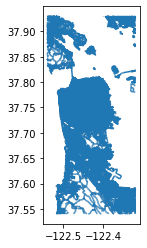

In [29]:
osm = OSM(sf)
roads = osm.get_network()
roads = roads.set_crs(epsg=4269, allow_override=True)
roads.plot()

### Anlyzing San Francisco data

In [30]:
roads.head()

,access,area,bicycle,bridge,busway,cycleway,est_width,foot,footway,highway,...,tunnel,turn,width,id,timestamp,version,tags,osm_type,geometry,length
0,None,None,None,None,None,None,None,None,None,residential,...,None,None,None,5004035,0,-1,None,way,"MULTILINESTRING ((-122.41648 37.79905, -122.41...",75.0
1,None,None,None,None,None,None,None,None,None,residential,...,None,None,None,7373728,0,-1,None,way,"MULTILINESTRING ((-122.40013 37.77428, -122.40...",98.0
2,None,None,None,None,None,None,None,None,None,residential,...,None,None,None,7373736,0,-1,"{""name:etymology:wikidata"":""Q107178240""}",way,"MULTILINESTRING ((-122.40013 37.77428, -122.39...",534.0
3,None,None,None,None,None,None,None,None,None,residential,...,None,None,None,7448875,0,-1,"{""name:etymology:wikidata"":""Q16105754""}",way,"MULTILINESTRING ((-122.39110 37.76967, -122.39...",147.0
4,None,None,None,None,None,None,None,None,None,track,...,None,None,None,7715657,0,-1,"{""created_by"":""JOSM"",""motorcycle"":""no""}",way,"MULTILINESTRING ((-122.32459 37.88995, -122.32...",274.0


In [31]:
roads.columns

Index(['access', 'area', 'bicycle', 'bridge', 'busway', 'cycleway',
       'est_width', 'foot', 'footway', 'highway', 'junction', 'lanes', 'lit',
       'maxspeed', 'motorcar', 'motor_vehicle', 'name', 'oneway', 'overtaking',
       'path', 'psv', 'ref', 'service', 'segregated', 'sidewalk', 'smoothness',
       'surface', 'tracktype', 'tunnel', 'turn', 'width', 'id', 'timestamp',
       'version', 'tags', 'osm_type', 'geometry', 'length'],
      dtype='object')

# Chosing the most usefull columns for our problem
#### We are cleaning San Francisco data to have only meaningfull attributes

In [32]:
roads_usefull_cols = ['highway', 'name', 'geometry']
cleaned_roads = roads[roads_usefull_cols]

In [33]:
cleaned_roads.head()

,highway,name,geometry
0,residential,Macondray Lane,"MULTILINESTRING ((-122.41648 37.79905, -122.41..."
1,residential,6th Street,"MULTILINESTRING ((-122.40013 37.77428, -122.40..."
2,residential,Bluxome Street,"MULTILINESTRING ((-122.40013 37.77428, -122.39..."
3,residential,Nelson Rising Lane,"MULTILINESTRING ((-122.39110 37.76967, -122.39..."
4,track,None,"MULTILINESTRING ((-122.32459 37.88995, -122.32..."


# Combining our GeoDataFrame with cleaned San Francisco GeoDataFrame
##### At first we tried sjon function, however it took into account only regulations applied on streets so it did not work correctly when any parking regluation was apllied on sidewalks 
##### To prevent our dataset from loosing the majority of records we decided to use sjon_nearest function an play with max_distance attribute - succesfully we found the value that gave as the correct amount of records

In [34]:
combined_df = gpd.sjoin_nearest(geo_df, cleaned_roads, max_distance=0.0000768)

In [35]:
combined_df

,REGULATION,DAYS,HRS_BEGIN,HRS_END,HRLIMIT,LAST_EDITED_USER,LAST_EDITED_DATE,EXCEPTIONS,shape,geometry,index_right,highway,name
0,time limited,m-sa,700.0,1800.0,1.0,mta,20170513001346,none. regulation applies to all vehicles.,"(LINESTRING (-122.49074 37.74207, -122.490746 ...","MULTILINESTRING ((-122.49074 37.74207, -122.49...",27070,residential,33rd Avenue
1,time limited,m-f,900.0,1800.0,4.0,gchan,20190820232238,none. regulation applies to all vehicles.,"(LINESTRING (-122.38895 37.742348, -122.38822 ...","MULTILINESTRING ((-122.38895 37.74235, -122.38...",46750,footway,None
2,time limited,m-f,900.0,1800.0,4.0,gchan,20190820232234,none. regulation applies to all vehicles.,"(LINESTRING (-122.38897 37.742317, -122.38824 ...","MULTILINESTRING ((-122.38897 37.74232, -122.38...",46750,footway,None
1,time limited,m-f,900.0,1800.0,4.0,gchan,20190820232238,none. regulation applies to all vehicles.,"(LINESTRING (-122.38895 37.742348, -122.38822 ...","MULTILINESTRING ((-122.38895 37.74235, -122.38...",738,primary,3rd Street
2,time limited,m-f,900.0,1800.0,4.0,gchan,20190820232234,none. regulation applies to all vehicles.,"(LINESTRING (-122.38897 37.742317, -122.38824 ...","MULTILINESTRING ((-122.38897 37.74232, -122.38...",27107,primary,3rd Street
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7741,government permit,NaN,0.0,0.0,0.0,mta,20160909230609,NaN,"(LINESTRING (-122.40382 37.776268, -122.4034 3...","MULTILINESTRING ((-122.40382 37.77627, -122.40...",2407,residential,Harriet Street
7743,government permit,NaN,0.0,0.0,0.0,mta,20160909230726,NaN,"(LINESTRING (-122.40362 37.77529, -122.403206 ...","MULTILINESTRING ((-122.40362 37.77529, -122.40...",2407,residential,Harriet Street
7742,government permit,NaN,0.0,0.0,NaN,joelmandella,20180221010035,sfpd vehicles with a permit from the sfmta all...,"(LINESTRING (-122.431915 37.78001, -122.43196 ...","MULTILINESTRING ((-122.43192 37.78001, -122.43...",38334,service,None
7744,government permit,NaN,0.0,0.0,0.0,mta,20160909230528,NaN,"(LINESTRING (-122.40477 37.774487, -122.40455 ...","MULTILINESTRING ((-122.40477 37.77449, -122.40...",54937,secondary,Bryant Street


In [36]:
print(combined_df.crs)

epsg:4269


# Plotting regulations area

In [37]:
import matplotlib.pyplot as plt

government permit: red
limited no parking: orange
no overnight parking: purple
no oversized vehicles: yellow
no parking anytime: pink
no stopping: brown
paid + permit: green
time limited: blue


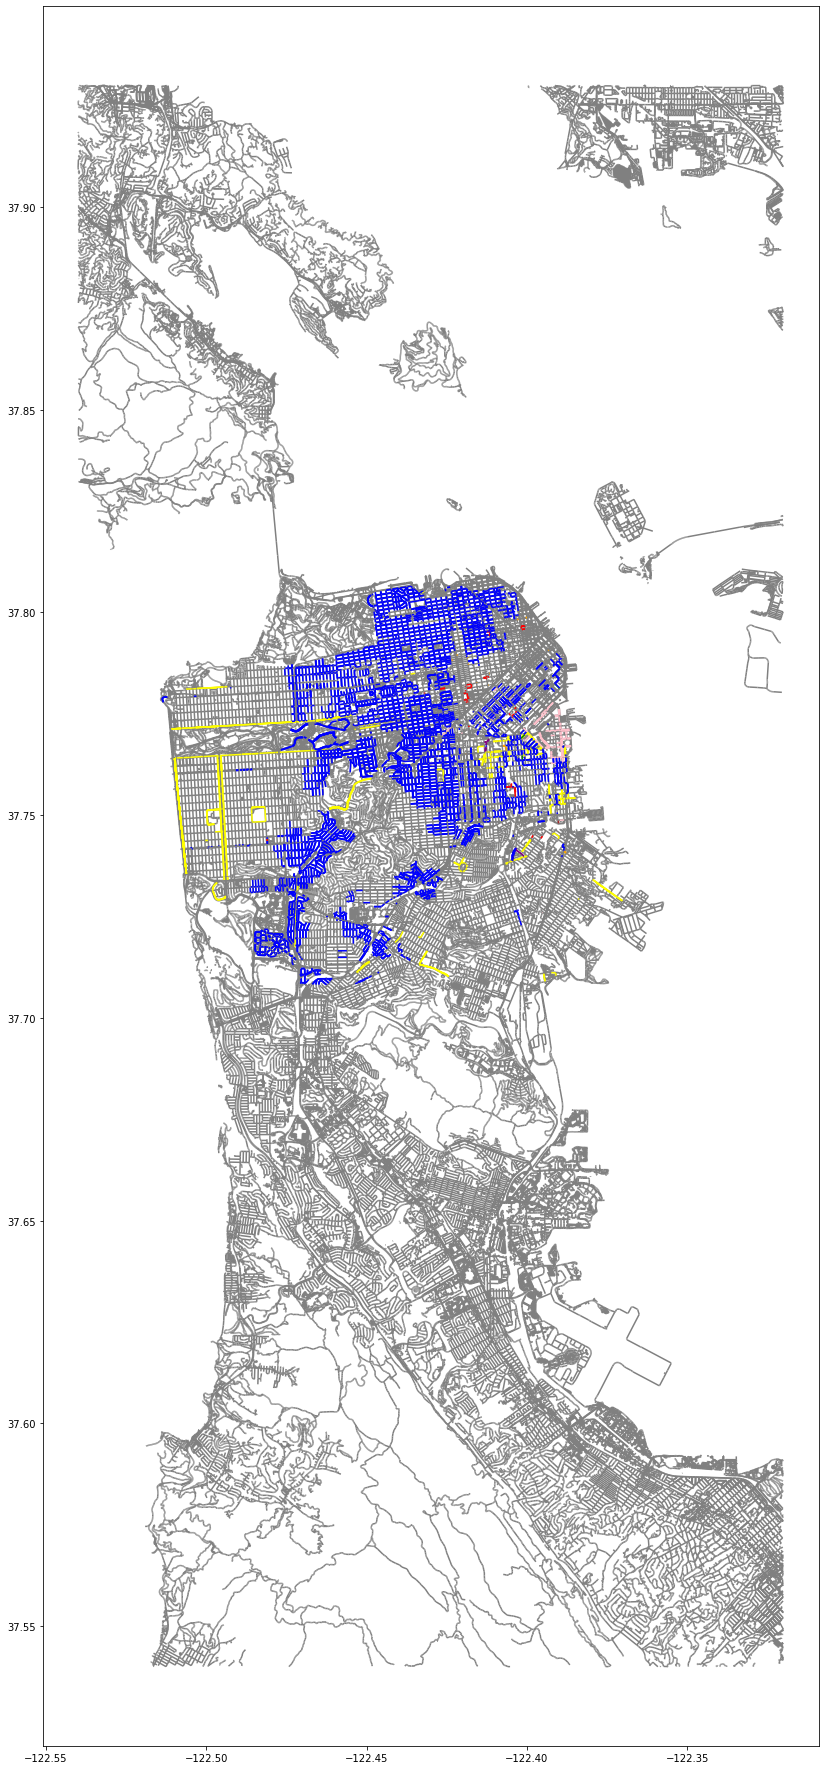

In [38]:
regulation_color = {"government permit" : "red",
                    "limited no parking" : "orange",
                    "no overnight parking" : "purple",
                    "no oversized vehicles" : "yellow",
                    "no parking anytime" : "pink",
                    "no stopping" : "brown",
                    "paid + permit" : "green",
                    "time limited" : "blue"}
fig, ax = plt.subplots(figsize = (40, 32))
roads.plot(ax=ax, color="gray")
for reg in regulations:
    print(reg + ": " + regulation_color[reg])
    tmp_df = combined_df[combined_df['REGULATION'] == reg]
    tmp_df.plot(ax=ax, color=regulation_color[reg])

# Machine Learning idea with San Francisco parking regulations data
Our idea is to make a machine learning model which will be able to predict which parking regulations are applied in specific area, based on:
- The type of way that contains the parking area, e.g. service, footway, primary etc
- Time when parking regulation starts, e.g. 700.0 = 07:00 AM etc
- Time when parking regulation ends, e.g. 1800.0 = 06:00 PM etc
- Days when parking regulation is in force, e.g. 'm-f' = (Monday - Friday), 'm, th' = (Monday, Thursday)
- Hours of parking limit

So we took only usefull columns from merged dataframe 

In [39]:
machine_learning_df = combined_df[['highway', 'HRS_BEGIN', 'HRS_END', 'DAYS', 'HRLIMIT', 'REGULATION']]

In [40]:
machine_learning_df.head()

,highway,HRS_BEGIN,HRS_END,DAYS,HRLIMIT,REGULATION
0,residential,700.0,1800.0,m-sa,1.0,time limited
1,footway,900.0,1800.0,m-f,4.0,time limited
2,footway,900.0,1800.0,m-f,4.0,time limited
1,primary,900.0,1800.0,m-f,4.0,time limited
2,primary,900.0,1800.0,m-f,4.0,time limited


# Dealing with DAYS column

In [41]:
days = [day for day in machine_learning_df.DAYS  if not pd.isnull(day)]
days = list(set(days))
print(days)

['sa', 'm-sat', 'm-f', 'm-s', 'm-su', 'm-sa', 'm, th']


#### Firstly we changed duplicated 'm-sat' to 'm-sa' to make sure that they will be considered as one

In [42]:
machine_learning_df["DAYS"].replace({"m-sat": "m-sa"}, inplace=True)

In [43]:
days = [day for day in machine_learning_df.DAYS  if not pd.isnull(day)]
days = list(set(days))
print(days)

['sa', 'm-f', 'm-s', 'm-su', 'm-sa', 'm, th']


#### Then we tried to find out if 'm-s' means Monday-Saturday or Monday-Sunday

In [44]:
print(machine_learning_df.loc[machine_learning_df['DAYS'] == 'm-s'])

          highway  HRS_BEGIN  HRS_END DAYS  HRLIMIT    REGULATION
4954  residential      700.0   1800.0  m-s      2.0  time limited
5896  residential      700.0   1800.0  m-s      4.0  time limited
913       footway      700.0   1800.0  m-s      2.0  time limited
1830  residential      700.0   1800.0  m-s      2.0  time limited
6238  residential      700.0   1800.0  m-s      2.0  time limited
3009      footway      700.0   1800.0  m-s      2.0  time limited
6276      footway      700.0   1800.0  m-s      2.0  time limited
3470      footway      700.0   1800.0  m-s      2.0  time limited
4336      footway      700.0   1800.0  m-s      2.0  time limited
4651  residential      700.0   1800.0  m-s      2.0  time limited
4717  residential      700.0   1800.0  m-s      2.0  time limited
5467      footway      700.0   1800.0  m-s      2.0  time limited
5467      service      700.0   1800.0  m-s      2.0  time limited
5896  residential      700.0   1800.0  m-s      4.0  time limited
6276      

In [45]:
print(machine_learning_df.loc[machine_learning_df['DAYS'] == 'm-sa'])

          highway  HRS_BEGIN  HRS_END  DAYS  HRLIMIT     REGULATION
0     residential      700.0   1800.0  m-sa      1.0   time limited
6         footway      900.0   2200.0  m-sa      4.0   time limited
11        footway      700.0   1800.0  m-sa      1.0   time limited
196       footway      700.0   1800.0  m-sa      1.0   time limited
20        footway      700.0   1800.0  m-sa      1.0   time limited
...           ...        ...      ...   ...      ...            ...
7725     tertiary      700.0   1800.0  m-sa      4.0   time limited
7699      footway      900.0   1800.0  m-sa      NaN  paid + permit
7704    secondary      700.0   1800.0  m-sa      4.0   time limited
7711      service      900.0   1800.0  m-sa      NaN  paid + permit
7732    secondary      700.0   1800.0  m-sa      4.0   time limited

[1377 rows x 6 columns]


In [46]:
print(machine_learning_df.loc[machine_learning_df['DAYS'] == 'm-su'])

      highway  HRS_BEGIN  HRS_END  DAYS  HRLIMIT             REGULATION
3016  footway     2400.0    600.0  m-su      0.0  no oversized vehicles
3833  footway     2400.0    600.0  m-su      0.0  no oversized vehicles
5271  footway     2400.0    600.0  m-su      0.0  no oversized vehicles
6311  footway      700.0   2200.0  m-su      2.0           time limited
60    footway     2400.0    600.0  m-su      NaN  no oversized vehicles
...       ...        ...      ...   ...      ...                    ...
7636  footway      700.0   2100.0  m-su      2.0           time limited
7637  footway      700.0   2100.0  m-su      2.0           time limited
7658  footway        0.0      0.0  m-su      0.0      government permit
7662  service        0.0      0.0  m-su      0.0      government permit
7689  primary     2400.0    600.0  m-su      NaN  no oversized vehicles

[786 rows x 6 columns]


#### It is hard to find out if m-s means Monday-Saturday or Monday-Sunday, however it consists of only 19 records of our data, so we decided to delete it

In [47]:
machine_learning_df = machine_learning_df[machine_learning_df.DAYS != 'm-s']

In [48]:
days = [day for day in machine_learning_df.DAYS  if not pd.isnull(day)]
days = list(set(days))
print(days)

['m-f', 'm-su', 'm, th', 'm-sa', 'sa']


# Converting string values into numeric values using LabelEncoder

In [49]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [50]:
cols_to_encode = ['highway', 'DAYS']
for col in cols_to_encode:
    machine_learning_df[col] = encoder.fit_transform(machine_learning_df[col].values)
    print(encoder.classes_)

['corridor' 'cycleway' 'footway' 'living_street' 'path' 'pedestrian'
 'primary' 'primary_link' 'residential' 'secondary' 'secondary_link'
 'service' 'steps' 'tertiary' 'tertiary_link' 'track' 'trunk' 'trunk_link'
 'unclassified']
['m, th' 'm-f' 'm-sa' 'm-su' 'sa' nan]


# Filling missing values with its column mean

In [51]:
machine_learning_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7707 entries, 0 to 7746
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   highway     7707 non-null   int32  
 1   HRS_BEGIN   7579 non-null   float64
 2   HRS_END     7579 non-null   float64
 3   DAYS        7707 non-null   int32  
 4   HRLIMIT     7416 non-null   float64
 5   REGULATION  7707 non-null   object 
dtypes: float64(3), int32(2), object(1)
memory usage: 361.3+ KB


In [52]:
for col in machine_learning_df:
    if col != "REGULATION":
        machine_learning_df.fillna(value=machine_learning_df[col].mean(), inplace=True)

In [53]:
machine_learning_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7707 entries, 0 to 7746
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   highway     7707 non-null   int32  
 1   HRS_BEGIN   7707 non-null   float64
 2   HRS_END     7707 non-null   float64
 3   DAYS        7707 non-null   int32  
 4   HRLIMIT     7707 non-null   float64
 5   REGULATION  7707 non-null   object 
dtypes: float64(3), int32(2), object(1)
memory usage: 361.3+ KB


# Our DataFrame is finally ready! Let's start with Machine Learning 
##### Creating X - data, and y - target

In [54]:
X = machine_learning_df[['highway', 'HRS_BEGIN', 'HRS_END', 'DAYS', 'HRLIMIT']]
y = machine_learning_df['REGULATION']

In [55]:
X.head()

,highway,HRS_BEGIN,HRS_END,DAYS,HRLIMIT
0,8,700.0,1800.0,2,1.0
1,2,900.0,1800.0,1,4.0
2,2,900.0,1800.0,1,4.0
1,6,900.0,1800.0,1,4.0
2,6,900.0,1800.0,1,4.0


In [56]:
y.head()

0    time limited
1    time limited
2    time limited
1    time limited
2    time limited
Name: REGULATION, dtype: object

# Spliting our data into train and test sets

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Creating RandomForestClassifier
##### Our ML idea is typical classification example. We tried few different classifiers however they all gave similiar results so we decided to go with random forest because we know it quite well 

In [58]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=20)

In [59]:
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [60]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

# Checking accuracy score

In [61]:
from sklearn.metrics import accuracy_score
train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

In [62]:
print("Train accuracy: ", train_acc)
print("Test accuracy: ", test_acc)

Train accuracy:  0.9980535279805353
Test accuracy:  0.9941634241245136
